In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip /content/drive/"My Drive"/hansu/test.zip -d /content/test
!unzip /content/drive/"My Drive"/hansu/train.zip -d /content/train

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/train/train/train_57735.npy  
  inflating: /content/train/train/train_57736.npy  
  inflating: /content/train/train/train_57737.npy  
  inflating: /content/train/train/train_57738.npy  
  inflating: /content/train/train/train_57739.npy  
  inflating: /content/train/train/train_57740.npy  
  inflating: /content/train/train/train_57741.npy  
  inflating: /content/train/train/train_57742.npy  
  inflating: /content/train/train/train_57743.npy  
  inflating: /content/train/train/train_57744.npy  
  inflating: /content/train/train/train_57745.npy  
  inflating: /content/train/train/train_57746.npy  
  inflating: /content/train/train/train_57747.npy  
  inflating: /content/train/train/train_57748.npy  
  inflating: /content/train/train/train_57749.npy  
  inflating: /content/train/train/train_57750.npy  
  inflating: /content/train/train/train_57751.npy  
  inflating: /content/train/train/train_57752.npy  
  inflating: /content/train/

# seed 고정

In [4]:
import tensorflow as tf
tf.random.set_seed(10101)
import numpy as np
np.random.seed(10101)

In [5]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random
from sklearn.model_selection import train_test_split,KFold
from tensorflow.keras.layers import Dense,MaxPooling3D,ConvLSTM2D,AveragePooling2D, Conv3DTranspose,Conv2D,Conv3D, UpSampling2D, Dropout, Conv2DTranspose, MaxPooling2D, BatchNormalization, Activation, concatenate, Input, GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Optimizer
import cv2
import warnings
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import pickle
from keras.callbacks import ModelCheckpoint

 
warnings.filterwarnings("ignore")
root_path = "/content/My Drive/hansu"

In [6]:
import math
from keras.callbacks import Callback
from keras import backend as K


class CosineAnnealingScheduler(Callback):
    """Cosine annealing scheduler.
    """

    def __init__(self, T_max, eta_max, eta_min=0, verbose=0):
        super(CosineAnnealingScheduler, self).__init__()
        self.T_max = T_max
        self.eta_max = eta_max
        self.eta_min = eta_min
        self.verbose = verbose

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
        lr = self.eta_min + (self.eta_max - self.eta_min) * (1 + math.cos(math.pi * epoch / self.T_max)) / 2
        K.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0:
            print('\nEpoch %05d: CosineAnnealingScheduler setting learning '
                  'rate to %s.' % (epoch + 1, lr))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)


In [9]:
train_files = glob.glob('/content/train/train/*.npy')
length = len(train_files)
print(length)

62735


In [ ]:
def trainGenerator():
    for id in range(length*5):
        if 0<= id <= length-1:
            dataset = np.load(train[id])
            if (dataset[:, :, :4] >= 0.1).sum() > 1000:
                # target= dataset[:,:,-1].reshape(120,120,1)
                # X1 = dataset[:,:,0]
                X2 = dataset[:,:,1] - dataset[:,:,0]
                # X3 = dataset[:,:,1]
                X4 = dataset[:,:,2] - dataset[:,:,1]
                # X5 = dataset[:,:,2]
                X6 = dataset[:,:,3] - dataset[:,:,2]
                # X7 = dataset[:,:,3]
                X = np.stack((X2,,X4,,X6), axis=-1)
                target = dataset[:,:,4] - dataset[:,:,3].reshape(120,120,1)
                remove_minus = np.where(target < 0, 0, target)
                # feature = dataset[:,:,:4]
                yield (X, remove_minus)

        # elif length <= id <= (length*2)-1:
        #     dataset = np.load(train[id - length-1])
        #     M = cv2.getRotationMatrix2D((60, 60), 90, 1.0)
        #     dataset = cv2.warpAffine(dataset, M, (120, 120))
        #     if (dataset[:, :, :4] >= 0.1).sum() > 1000:
        #         target= dataset[:,:,-1].reshape(120,120,1)
        #         remove_minus = np.where(target < 0, 0, target)
        #         feature = dataset[:,:,:4]
        #         yield (feature, remove_minus)

        # elif length*2 <= id <= (length*3)-1:
        #     dataset = np.load(train[id - length*2-1])
        #     dataset = cv2.flip(dataset,1)
        #     if (dataset[:, :, :4] >= 0.1).sum() > 1000:
        #         target= dataset[:,:,-1].reshape(120,120,1)
        #         remove_minus = np.where(target < 0, 0, target)
        #         feature = dataset[:,:,:4]
        #         yield (feature, remove_minus)

        # elif length*3 <= id <= (length*4)-1:
        #     dataset = np.load(train[id - length*3-1])
        #     M = cv2.getRotationMatrix2D((60, 60), 45, 1.0)
        #     dataset = cv2.warpAffine(dataset, M, (120, 120))
        #     if (dataset[:, :, :4] >= 0.1).sum() > 1000:
        #         target= dataset[:,:,-1].reshape(120,120,1)
        #         remove_minus = np.where(target < 0, 0, target)
        #         feature = dataset[:,:,:4]
        #         yield (feature, remove_minus)   

        # else:
        #     dataset = np.load(train[id - length*4-1])
        #     dataset = cv2.flip(dataset,0)
        #     if (dataset[:, :, :4] >= 0.1).sum() > 1000:
        #         target= dataset[:,:,-1].reshape(120,120,1)
        #         remove_minus = np.where(target < 0, 0, target)
        #         feature = dataset[:,:,:4]
        #         yield (feature, remove_minus)


def valGenerator():
    for file in val:
        dataset = np.load(file)
        if (dataset[:, :, :4] >= 0.1).sum() > 1000:
            # target= dataset[:,:,-1].reshape(120,120,1)
            # X1 = dataset[:,:,0]
            X2 = dataset[:,:,1] - dataset[:,:,0]
            # X3 = dataset[:,:,1]
            X4 = dataset[:,:,2] - dataset[:,:,1]
            # X5 = dataset[:,:,2]
            X6 = dataset[:,:,3] - dataset[:,:,2]
            # X7 = dataset[:,:,3]
            X = np.stack((X2,,X4,,X6), axis=-1)
            target = dataset[:,:,4] - dataset[:,:,3].reshape(120,120,1)
            remove_minus = np.where(target < 0, 0, target)
            # feature = dataset[:,:,:4]
            yield (X, remove_minus)

In [ ]:
last = 32
def inception(shape_, LOOP):
    
    input_ = Input(shape=shape_)
    activation_ = 'relu'
    
    bn = BatchNormalization()(input_)
    conv0 = Conv2D(last*4, kernel_size=1, strides=1, padding='same',
                   activation=activation_, kernel_initializer='he_normal')(bn)
    bn = BatchNormalization()(conv0)
    conv = Conv2D(last*2, kernel_size=2, strides=1, padding='same',
                  activation=activation_, kernel_initializer='he_normal')(bn)
    concat = concatenate([conv0, conv], axis=3)

    bn = BatchNormalization()(concat)
    conv = Conv2D(last, kernel_size=3, strides=1, padding='same',
                  activation=activation_, kernel_initializer='he_normal')(bn)
    concat = concatenate([concat, conv], axis=3)
    
    for i in range(LOOP):
        bn = BatchNormalization()(concat)
        x_1 = Conv2D(last, 1, padding='same', activation=activation_)(bn)

        x_2 = Conv2D(last, 1, padding='same', activation=activation_)(bn)
        x_2 = Conv2D(last, 3, padding='same', activation=activation_)(x_2)

        x_3 = Conv2D(last, 1, padding='same', activation=activation_)(bn)
        x_3 = Conv2D(last, 3, padding='same', activation=activation_)(x_3)
        x_3 = Conv2D(last, 3, padding='same', activation=activation_)(x_3)

        x_4 = AveragePooling2D(
            pool_size=(3, 3), strides=1, padding='same')(bn)
        x_4 = Conv2D(last, 1, padding='same', activation=activation_)(x_4)

        concat = concatenate([x_1, x_2, x_3, x_4])
    
    bn = BatchNormalization()(concat)

    outputs = Conv2D(1, kernel_size=1, strides=1, padding='same',
                     activation=activation_, kernel_initializer='he_normal')(bn)

    model = Model(inputs=input_, outputs=outputs)

    return model

incep = inception((120,120,4), 5)

In [ ]:
def base_model(input_layer, start_neurons):
    
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer) #120
    # drop1 = Dropout(0.2) (conv1)
    # conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D((2, 2))(pool1) # 60 

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1) #60
    # drop2 = Dropout(0.2) (conv2)
    # conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2) #60
    pool2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D((2, 2))(pool2) # 30

    conv3 = Conv2D(start_neurons * 3, (3, 3), activation="relu", padding="same")(pool2) #30
    # drop3 = Dropout(0.2) (conv3)
    # conv3 = Conv2D(start_neurons * 3, (3, 3), activation="relu", padding="same")(conv3) #30
    pool3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D((2, 2))(pool3) # 15

    convm = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool3)


    deconv3 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Conv2D(start_neurons * 3, (3, 3), activation="relu", padding="same")(uconv3)
    # drop4 = Dropout(0.2) (uconv3)
    # uconv3 = Conv2D(start_neurons * 3, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = BatchNormalization()(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    # drop5 = Dropout(0.2) (uconv2)
    # uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = BatchNormalization()(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    # drop6 = Dropout(0.2) (uconv1)
    # uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    output_layer = Conv2D(1, (1,1), padding="same", activation='relu')(uconv1)
    
    return output_layer

input_layer = Input((120, 120, 7))
output_layer = base_model(input_layer,128)
base = Model(input_layer,output_layer)

In [ ]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=7777)
model_number = 0
epochs = 20
batch_size = 64
MODEL_SAVE_FOLDER_PATH = "/content/drive/My Drive/hansu/checkpoints/"

for train_idx, val_idx in k_fold.split(train_files):
        print(f'Fold{model_number + 1}')
        models = []
        train = []
        val = []
        for i in range(len(train_files)):
            if i in train_idx:
                train.append(train_files[i])
            else:
                val.append(train_files[i])
        length = len(train)

        train_dataset = tf.data.Dataset.from_generator(trainGenerator, (tf.float32, tf.float32), (tf.TensorShape([120,120,7]),tf.TensorShape([120,120,1])))
        train_dataset = train_dataset.shuffle(batch_size)
        train_dataset = train_dataset.batch(batch_size).prefetch(1)

        val_dataset = tf.data.Dataset.from_generator(valGenerator, (tf.float32, tf.float32), (tf.TensorShape([120,120,7]),tf.TensorShape([120,120,1])))
        val_dataset = val_dataset.batch(batch_size).prefetch(1)

        adam = tf.keras.optimizers.Adam()
        base.compile(optimizer = adam,loss = 'mae')

        callbacks = CosineAnnealingScheduler(T_max=100, eta_max=1e-2, eta_min=1e-4)

        model_path = MODEL_SAVE_FOLDER_PATH + f'{model_number}-rain.h5'
        cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)
        
        base.fit(train_dataset, epochs = epochs, verbose=1, validation_data=val_dataset, callbacks=[callbacks, cb_checkpoint])

        model_number = model_number + 1

Fold1
Epoch 1/20
      2/Unknown - 0s 135ms/step - loss: 4.4980WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1039s vs `on_train_batch_end` time: 0.1651s). Check your callbacks.
    678/Unknown - 182s 268ms/step - loss: 3.8359
Epoch 00001: val_loss improved from inf to 3.78128, saving model to /content/drive/My Drive/hansu/checkpoints/0-rain.h5
678/678 [==============================] - 200s 295ms/step - loss: 3.8359 - val_loss: 3.7813
Epoch 2/20
677/678 [============================>.] - ETA: 0s - loss: 3.5029
Epoch 00002: val_loss improved from 3.78128 to 3.61831, saving model to /content/drive/My Drive/hansu/checkpoints/0-rain.h5
678/678 [==============================] - 199s 294ms/step - loss: 3.5029 - val_loss: 3.6183
Epoch 3/20
677/678 [============================>.] - ETA: 0s - loss: 3.3660
Epoch 00003: val_loss improved from 3.61831 to 3.54393, saving model to /content/drive/My Drive/hansu/checkpoints/0-rain.h5
678/6

In [ ]:
import gc
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
def loss(final_X_answers, final_X_pred):
  pred = final_X_pred
  answer = final_X_answers
  mae = mean_absolute_error(answer, pred)
  print(mae)

In [ ]:
input_layer = Input((120, 120, 4))
output_layer = base_model(input_layer,64)
model = Model(input_layer,output_layer)

In [ ]:
test_path = '/content/test'
test_files = sorted(glob.glob(test_path + '/*.npy'))
X_test = []
for file in tqdm(test_files, desc = 'test'):
    data = np.load(file)
    X_test.append(data)

X_test = np.array(X_test)

test: 100%|██████████| 2674/2674 [00:04<00:00, 592.02it/s]


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42)
total_val = []
total_answer = []
test_preds = []

for train_idx, val_idx in k_fold.split(train_files):
    X_val = []
    X_answers = []
    models = []
    train = []
    val_file = []
    for i in range(len(train_files)):
        if i in train_idx:
            train.append(train_files[i])
        else:
            val_file.append(train_files[i])
  
    for file in tqdm(val_file, desc='val'):
        data = np.load(file)
        X_answer = data[:,:,-1].reshape(14400)
        X_input = data[:,:,:4]
    
        X_val.append(X_input)
        X_answers.append(X_answer)
    X_val = np.array(X_val)
    X_answers = np.array(X_answers)
    model.load_weights(MODEL_SAVE_FOLDER_PATH + f'{model_number-1}-rain.h5')

    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)

    test_pred = test_pred.reshape(-1,14400)
    final_X_val = val_pred.reshape(-1,14400)
    total_val.append(final_X_val)
    total_answer.append(X_answers)
    test_preds.append(test_pred)
    
    del val_pred, X_val, X_answers, final_X_val
    gc.collect()

val: 100%|██████████| 12547/12547 [00:03<00:00, 3205.17it/s]


In [ ]:
final_val = np.reshape(np.array(total_val), (5*12547,14400))
final_answer = np.reshape(np.array(total_answer),(5*12547,14400))
loss(final_answer, final_val)

830.9314


In [ ]:
final_preds = (test_preds[0]+test_preds[1]+test_preds[2]+test_preds[3]+test_preds[4])/5
sub = pd.read_csv('/content/drive/My Drive/hansu/sample_submission.csv')
sub.iloc[:,1:] = final_preds.astype(int)
sub.to_csv("submission.csv", index=False)
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import f1_score

def mae(y_true, y_pred) :
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    y_true = y_true.reshape(1, -1)[0]
    
    y_pred = y_pred.reshape(1, -1)[0]
    
    over_threshold = y_true >= 0.1
    
    return np.mean(np.abs(y_true[over_threshold] - y_pred[over_threshold]))

def fscore(y_true, y_pred):
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    y_true = y_true.reshape(1, -1)[0]
    
    y_pred = y_pred.reshape(1, -1)[0]
    
    remove_NAs = y_true >= 0
    
    y_true = np.where(y_true[remove_NAs] >= 0.1, 1, 0)
    
    y_pred = np.where(y_pred[remove_NAs] >= 0.1, 1, 0)
    
    return(f1_score(y_true, y_pred))

def maeOverFscore(y_true, y_pred):
    
    return mae(y_true, y_pred) / (fscore(y_true, y_pred) + 1e-07)

def fscore_keras(y_true, y_pred):
    score = tf.py_function(func=fscore, inp=[y_true, y_pred], Tout=tf.float32, name='fscore_keras')
    return score

def maeOverFscore_keras(y_true, y_pred):
    score = tf.py_function(func=maeOverFscore, inp=[y_true, y_pred], Tout=tf.float32,  name='custom_mse') 
    return score

In [ ]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid

def attach_attention_module(net, attention_module):
  if attention_module == 'se_block': # SE_block
    net = se_block(net)
  elif attention_module == 'cbam_block': # CBAM_block
    net = cbam_block(net)
  else:
    raise Exception("'{}' is not supported attention module!".format(attention_module))

  return net

def se_block(input_feature, ratio=8):
	"""Contains the implementation of Squeeze-and-Excitation(SE) block.
	As described in https://arxiv.org/abs/1709.01507.
	"""
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]

	se_feature = GlobalAveragePooling2D()(input_feature)
	se_feature = Reshape((1, 1, channel))(se_feature)
	assert se_feature.shape[1:] == (1,1,channel)
	se_feature = Dense(channel // ratio,
					   activation='relu',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature.shape[1:] == (1,1,channel//ratio)
	se_feature = Dense(channel,
					   activation='sigmoid',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature.shape[1:] == (1,1,channel)
	if K.image_data_format() == 'channels_first':
		se_feature = Permute((3, 1, 2))(se_feature)

	se_feature = multiply([input_feature, se_feature])
	return se_feature

def cbam_block(cbam_feature, ratio=8):
	"""Contains the implementation of Convolutional Block Attention Module(CBAM) block.
	As described in https://arxiv.org/abs/1807.06521.
	"""
	
	cbam_feature = channel_attention(cbam_feature, ratio)
	cbam_feature = spatial_attention(cbam_feature)
	return cbam_feature

def channel_attention(input_feature, ratio=8):
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]
	
	shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	
	avg_pool = GlobalAveragePooling2D()(input_feature)    
	avg_pool = Reshape((1,1,channel))(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	avg_pool = shared_layer_one(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel//ratio)
	avg_pool = shared_layer_two(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	
	max_pool = GlobalMaxPooling2D()(input_feature)
	max_pool = Reshape((1,1,channel))(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	max_pool = shared_layer_one(max_pool)
	assert max_pool.shape[1:] == (1,1,channel//ratio)
	max_pool = shared_layer_two(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	
	cbam_feature = Add()([avg_pool,max_pool])
	cbam_feature = Activation('sigmoid')(cbam_feature)
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
	
	return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
	kernel_size = 7
	
	if K.image_data_format() == "channels_first":
		channel = input_feature.shape[1]
		cbam_feature = Permute((2,3,1))(input_feature)
	else:
		channel = input_feature.shape[-1]
		cbam_feature = input_feature
	
	avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
	assert avg_pool.shape[-1] == 1
	max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
	assert max_pool.shape[-1] == 1
	concat = Concatenate(axis=3)([avg_pool, max_pool])
	assert concat.shape[-1] == 2
	cbam_feature = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)	
	assert cbam_feature.shape[-1] == 1
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
		
	return multiply([input_feature, cbam_feature])
		

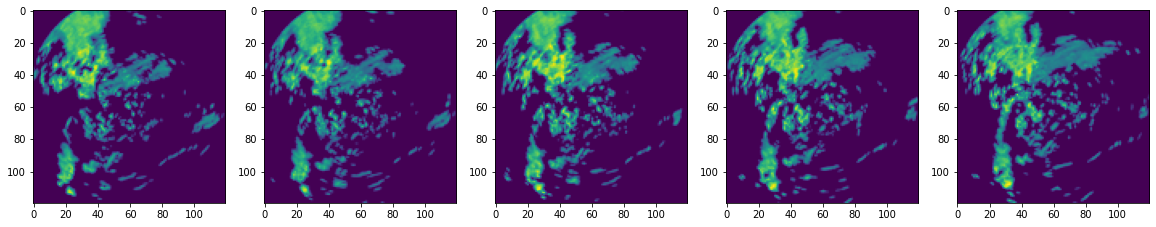

In [10]:
from PIL import Image
image_sample = np.load(train_files[4]).astype('float32')
# M = cv2.getRotationMatrix2D((60, 60), 45, 1.0)
# image_sample = cv2.warpAffine(image_sample, M, (120, 120))
plt.figure(figsize=(20, 20))

for i in range(4):
    plt.subplot(1,5,i+1)
    plt.imshow(image_sample[:, :, i])

plt.subplot(1,5,5)
plt.imshow(image_sample[:,:,-1])
plt.show()

In [29]:
import numpy as np
import cv2
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.01,
                       minDistance = 30,
                       blockSize = 14)
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 0,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
old_gray = image_sample[:,:,0]
# old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    frame_gray = image_sample[:,:,1]
    # frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)
    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
cv2.destroyAllWindows()

error: ignored

In [22]:
p0.shape

(10, 1, 2)

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture('./data/vtest.avi')
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 120,
                       qualityLevel = 0.01,
                       minDistance = 30,
                       blockSize = 14)
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 0,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
# ret, old_frame = cap.read() #old_frame = 이전 사진
old_frame = image_sample[:,:,0]
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret,frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)
    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
cv2.destroyAllWindows()

In [ ]:
M = cv2.getRotationMatrix2D((60, 60), 45, 1.0)
rotated = cv2.warpAffine(image_sample, M, (120, 120))

In [ ]:
#original = 120
size = 120
size_ratio = 1
last = 16
def base_model(input_layer, start_neurons):
    
    conv1 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same", return_sequences=True)(input_layer)
    pool1 = BatchNormalization()(conv1)
    pool1 = MaxPooling3D((2, 2, 2))(pool1) #60

    conv2 = ConvLSTM2D(start_neurons * 2, (3, 3), padding="same",return_sequences=True)(pool1)
    pool2 = BatchNormalization()(conv2)
    pool2 = MaxPooling3D((2, 2, 2))(pool2) #30

    # conv3 = ConvLSTM2D(start_neurons * 3, (3, 3), padding="same",return_sequences=True)(pool2)
    # pool3 = BatchNormalization()(conv3)
    # pool3 = MaxPooling3D((2, 2, 2))(pool3) #15

    convm = ConvLSTM2D(start_neurons * 4, (3, 3), padding="same",return_sequences=True)(pool2)

    # deconv3 = Conv3DTranspose(start_neurons * 3, (3, 3, 3), strides=(2, 2), padding="same")(convm) #30
    # uconv3 = concatenate([deconv3, conv3])
    # uconv3 = ConvLSTM2D(start_neurons * 3, (3, 3), padding="same")(uconv3)
    # uconv3 = BatchNormalization()(uconv3)

    deconv2 = Conv3DTranspose(start_neurons * 2, (3, 3, 3), strides=(2,2, 2), padding="same")(convm) #60
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = ConvLSTM2D(start_neurons * 2, (3, 3), padding="same", return_sequences=True)(uconv2)
    uconv2 = BatchNormalization()(uconv2)

    deconv1 = Conv3DTranspose(start_neurons * 1, (3, 3, 3), strides=(2,2, 2), padding="same")(uconv2) #120
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same", return_sequences=True)(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    output_layer = Conv3D(1, (1,1,1), padding="same")(uconv1)
    
    return output_layer

input_layer = Input((4, size, size, 1))
output_layer = base_model(input_layer, 64)
unet = Model(input_layer,output_layer)

In [ ]:
last = 8
def create_model():
    inputs=Input((4, 120, 120, 1))
    
    conv0=ConvLSTM2D(last*8, kernel_size=1, strides=1, padding='same',return_sequences=True)(inputs)
    conv0=Dropout(0.5)(conv0)
    
    bn=BatchNormalization()(conv0)
    conv=ConvLSTM2D(last*4, kernel_size=2, strides=1, padding='same',return_sequences=True)(bn)
    conv=Dropout(0.5)(conv)
    concat=concatenate([conv0, conv], axis=4)
    
    bn=BatchNormalization()(concat)
    conv=ConvLSTM2D(last*2, kernel_size=3, strides=1, padding='same',return_sequences=True)(bn)
    conv=Dropout(0.5)(conv)
    concat=concatenate([concat, conv], axis=4)

    for i in range(5):
        bn=BatchNormalization()(concat)
        conv=ConvLSTM2D(last, kernel_size=3, strides=1, padding='same',return_sequences=True)(bn)
        conv=Dropout(0.5)(conv)
        concat=concatenate([concat, conv], axis=4)
    
    bn=BatchNormalization()(concat)
    outputs=Conv3D(1, (1,1,1), strides=1, padding='same')(bn)
    
    model=Model(inputs=inputs, outputs=outputs)
    
    return model

resnet = create_model()

In [ ]:
resnet.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 120, 120, 0                                            
__________________________________________________________________________________________________
conv_lst_m2d (ConvLSTM2D)       (None, 4, 120, 120,  66560       input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 4, 120, 120,  0           conv_lst_m2d[0][0]               
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4, 120, 120,  512         dropout[0][0]                    
_______________________________________________________________________________________

In [ ]:
def base_model(input_layer, start_neurons):
    
    conv1 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(input_layer)
    pool1 = BatchNormalization()(conv1)

    conv2 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(pool1)
    conv2 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(conv2)
    pool2 = BatchNormalization()(conv2)

    conv2 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(pool2)
    conv2 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(conv2)
    pool2 = BatchNormalization()(conv2)

    conv2 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(pool2)
    conv2 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(conv2)
    pool2 = BatchNormalization()(conv2)

    conv2 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(pool2)
    conv2 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(conv2)
    pool2 = BatchNormalization()(conv2)

    conv3 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(pool2)
    conv3 = ConvLSTM2D(start_neurons * 1, (3, 3), padding="same",return_sequences=True)(conv3)
    pool3 = BatchNormalization()(conv3)

    output_layer = Conv3D(1, (3,3,3), padding="same", activation='relu')(pool3)
    
    return output_layer

size = 120
input_layer = Input((7, size, size, 1))
output_layer = base_model(input_layer, 32)
new = Model(input_layer,output_layer)

In [ ]:
new.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 7, 120, 120, 1)]  0         
_________________________________________________________________
conv_lst_m2d_55 (ConvLSTM2D) (None, 7, 120, 120, 32)   38144     
_________________________________________________________________
batch_normalization_30 (Batc (None, 7, 120, 120, 32)   128       
_________________________________________________________________
conv_lst_m2d_56 (ConvLSTM2D) (None, 7, 120, 120, 32)   73856     
_________________________________________________________________
conv_lst_m2d_57 (ConvLSTM2D) (None, 7, 120, 120, 32)   73856     
_________________________________________________________________
batch_normalization_31 (Batc (None, 7, 120, 120, 32)   128       
_________________________________________________________________
conv_lst_m2d_58 (ConvLSTM2D) (None, 7, 120, 120, 32) 

In [ ]:
#original = 120
size = 120
size_ratio = 1
last = 16
MODEL_SAVE_FOLDER_PATH = "/content/drive/My Drive/hansu/checkpoints/"
k_fold = KFold(n_splits=5, shuffle=True, random_state=7777)
model_number = 0
for train_idx, val_idx in k_fold.split(train_files):
        print(f'Fold{model_number + 1}')
        models = []
        train = []
        val = []
        for i in range(len(train_files)):
            if i in train_idx:
                train.append(train_files[i])
            else:
                val.append(train_files[i])
        length = len(train)

        def trainGenerator():
            for id in range(length*3):
                if 0<= id <= length-1:
                    dataset = np.load(train[id])
                    # dataset = cv2.resize(dataset, None, fx=size_ratio, fy=size_ratio, interpolation=cv2.INTER_AREA)
                    dataset = np.moveaxis(dataset, 2,0)
                    # dataset = np.asarray(dataset)
                    # mean, std = dataset.mean(), dataset.std()
                    # dataset = (dataset - mean) / std
                    # normalizedImg = np.zeros((size, size,4))
                    # dataset = cv2.normalize(dataset,  normalizedImg, 0, 1, cv2.NORM_MINMAX)
                    if (dataset[-1, :, :] >= 0.1).sum() >= 50:
                        target= dataset[-1,:,:].reshape(1,size,size)
                        y = np.where(target < 0, 0, target)
                        X1 = dataset[0,:,:]
                        X2 = (dataset[0,:,:] + dataset[1,:,:])/2
                        X3 = dataset[1,:,:]
                        X4 = (dataset[1,:,:] + dataset[2,:,:])/2
                        X5 = dataset[2,:,:]
                        X6 = (dataset[2,:,:] + dataset[3,:,:])/2
                        X7 = dataset[3,:,:]
                        X = np.stack((X1,X2,X3,X4,X5,X6,X7), axis=0)
                        # X = dataset[:4,:,:]
                        yield (X, y)

                elif length <= id <= (length*2)-1:
                    dataset = np.load(train[id - length-1])
                    # dataset = cv2.resize(dataset, None, fx=size_ratio, fy=size_ratio, interpolation=cv2.INTER_AREA)
                    dataset = np.moveaxis(dataset, 2,0)
                    dataset = cv2.flip(dataset,1)
                    # dataset = np.asarray(dataset)
                    # mean, std = dataset.mean(), dataset.std()
                    # dataset = (dataset - mean) / std
                    # dataset = cv2.normalize(dataset,  normalizedImg, 0, 1, cv2.NORM_MINMAX)
                    if (dataset[-1, :, :] >= 0.1).sum() >= 50:
                        target= dataset[-1,:,:].reshape(1,size,size)
                        y = np.where(target < 0, 0, target)
                        X1 = dataset[0,:,:]
                        X2 = (dataset[0,:,:] + dataset[1,:,:])/2
                        X3 = dataset[1,:,:]
                        X4 = (dataset[1,:,:] + dataset[2,:,:])/2
                        X5 = dataset[2,:,:]
                        X6 = (dataset[2,:,:] + dataset[3,:,:])/2
                        X7 = dataset[3,:,:]
                        X = np.stack((X1,X2,X3,X4,X5,X6,X7), axis=0)
                        # X = dataset[:4,:,:]
                        yield (X, y)

                else:
                    dataset = np.load(train[id - length*2-1])
                    # dataset = cv2.resize(dataset, None, fx=size_ratio, fy=size_ratio, interpolation=cv2.INTER_AREA)
                    dataset = np.moveaxis(dataset, 2,0)
                    dataset = cv2.flip(dataset,0)
                    # dataset = np.asarray(dataset)
                    # mean, std = dataset.mean(), dataset.std()
                    # dataset = (dataset - mean) / std
                    # dataset = cv2.normalize(dataset,  normalizedImg, 0, 1, cv2.NORM_MINMAX)
                    if (dataset[-1, :, :] >= 0.1).sum() >= 50:
                        target= dataset[-1,:,:].reshape(1,size,size)
                        y = np.where(target < 0, 0, target)
                        X1 = dataset[0,:,:]
                        X2 = (dataset[0,:,:] + dataset[1,:,:])/2
                        X3 = dataset[1,:,:]
                        X4 = (dataset[1,:,:] + dataset[2,:,:])/2
                        X5 = dataset[2,:,:]
                        X6 = (dataset[2,:,:] + dataset[3,:,:])/2
                        X7 = dataset[3,:,:]
                        X = np.stack((X1,X2,X3,X4,X5,X6,X7), axis=0)
                        # X = dataset[:4,:,:]
                        yield (X, y)

                # elif length*2 <= id <= (length*3)-1:
                #     dataset = np.load(train[id - (length*2)-1])
                #     matrix = cv2.getRotationMatrix2D((60, 60), 90, 1)
                #     dataset = cv2.warpAffine(dataset, matrix, (size, size))
                #     if (dataset[:, :, -1] >= 0.1).sum() >= 50:
                #         target= dataset[:,:,-1]
                #         y = np.where(target < 0, 0, target).reshape(size,size,1)
                #         X = dataset[:,:,:4]
                #         yield (X, y)

                # else:
                #     dataset = np.load(train[id - (length*3)-1])
                #     matrix = cv2.getRotationMatrix2D((60, 60), 270, 1)
                #     dataset = cv2.warpAffine(dataset, matrix, (size, size))
                #     if (dataset[:, :, -1] >= 0.1).sum() >= 50:
                #         target= dataset[:,:,-1]
                #         y = np.where(target < 0, 0, target).reshape(size,size,1)
                #         X = dataset[:,:,:4]
                #         yield (X, y)

        def valGenerator():
            for file in val:
                dataset = np.load(file)
                # dataset = cv2.resize(dataset, None, fx=size_ratio, fy=size_ratio, interpolation=cv2.INTER_AREA)
                dataset = np.moveaxis(dataset, 2,0)
                # dataset = np.asarray(dataset)
                # mean, std = dataset.mean(), dataset.std()
                # dataset = (dataset - mean) / std
                # normalizedImg = np.zeros((size, size,4))
                # dataset = cv2.normalize(dataset,  normalizedImg, 0, 64, cv2.NORM_MINMAX)
                if (dataset[-1, :, :] >= 0.1).sum() >= 50:
                    target= dataset[-1,:,:].reshape(1,size,size)
                    y = np.where(target < 0, 0, target)
                    X1 = dataset[0,:,:]
                    X2 = (dataset[0,:,:] + dataset[1,:,:])/2
                    X3 = dataset[1,:,:]
                    X4 = (dataset[1,:,:] + dataset[2,:,:])/2
                    X5 = dataset[2,:,:]
                    X6 = (dataset[2,:,:] + dataset[3,:,:])/2
                    X7 = dataset[3,:,:]
                    X = np.stack((X1,X2,X3,X4,X5,X6,X7), axis=0)
                    # X = dataset[:4,:,:]
                    yield (X, y)

        batch_size = 4
        train_dataset = tf.data.Dataset.from_generator(trainGenerator, (tf.float32, tf.float32), (tf.TensorShape([7,size,size]),tf.TensorShape([1,size,size])))
        train_dataset = train_dataset.batch(batch_size).prefetch(1)

        val_dataset = tf.data.Dataset.from_generator(valGenerator, (tf.float32, tf.float32), (tf.TensorShape([7,size,size]),tf.TensorShape([1,size,size])))
        val_dataset = val_dataset.batch(batch_size).prefetch(1)

        model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'
        cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)

        epochs = 10
        seed = 7
        decay_st = ((length*4*3)//batch_size+1)*epochs
        poly_sche = tf.keras.optimizers.schedules.PolynomialDecay(0.001, decay_st, end_learning_rate=1e-6, power=0.9)
        opt = tf.keras.optimizers.Adam(poly_sche)        
        new.compile(optimizer = opt,loss = 'mae')
        history = new.fit(train_dataset, epochs=epochs,validation_data=val_dataset,callbacks=[cb_checkpoint])
        
        with open(f'/content/drive/My Drive/hansu/history_{model_number}', 'wb') as file_pi:
                pickle.dump(history.history, file_pi)

        model_number = model_number + 1

Fold1
Epoch 1/10
   2122/Unknown - 1072s 505ms/step - loss: 6.5770

In [ ]:
test_path = '/content/test'
test_files = sorted(glob.glob(test_path + '/*.npy'))

X_test = []

for file in tqdm(test_files, desc = 'test'):
    
    dataset = np.load(file)
    X1 = dataset[:,:,1]
    X2 = (dataset[:,:,1] + dataset[:,:,2])/2
    X3 = dataset[:,:,2]
    X4 = (dataset[:,:,2] + dataset[:,:,3])/2
    X5 = dataset[:,:,3]
    X6 = (dataset[:,:,3] + dataset[:,:,4])/2
    X7 = dataset[:,:,4]
    data = np.stack((X1,X2,X3,X4,X5,X6,X7), axis=-1)
    
    X_test.append(data)
                  
X_test = np.array(X_test)

test:   0%|          | 0/2674 [00:00<?, ?it/s]


IndexError: ignored

In [ ]:
pred = unet.predict(X_test)

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/hansu/sample_submission.csv')

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/hansu/sample_submission.csv')
submission.iloc[:,1:] = pred.reshape(-1, 14400).astype(int)
submission.to_csv('/content/drive/My Drive/hansu/Dacon_baseline.csv', index = False)